## INSURANCE DATASET FOR ANALYSIS GOTTEN FROM KAGGLE
# OBJECTIVES
The goal is to find out from the data if there is a relationship between the diiferent features that are looked at when getting an insurance or when the insurance company is screening the policyholder or owner in order to determine how much he or she will be charged. We will load the dataset using the pandas read function and then perform the analysis, we will also train a machine learning model to predict the charge by spliting our dataset into a train and test set to be used for the machine learning Regression model. after that, we will check using an appropriate error checking parameter to see how our model performs. Join me as we move together.

First we import pandas library and then perform some minor checks

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Let us run a quick visualization of the dataset using pairplot to see a rough insight on what the data looks like and to discover if there is any quick insight we can gain 

In [9]:
import seaborn as sns

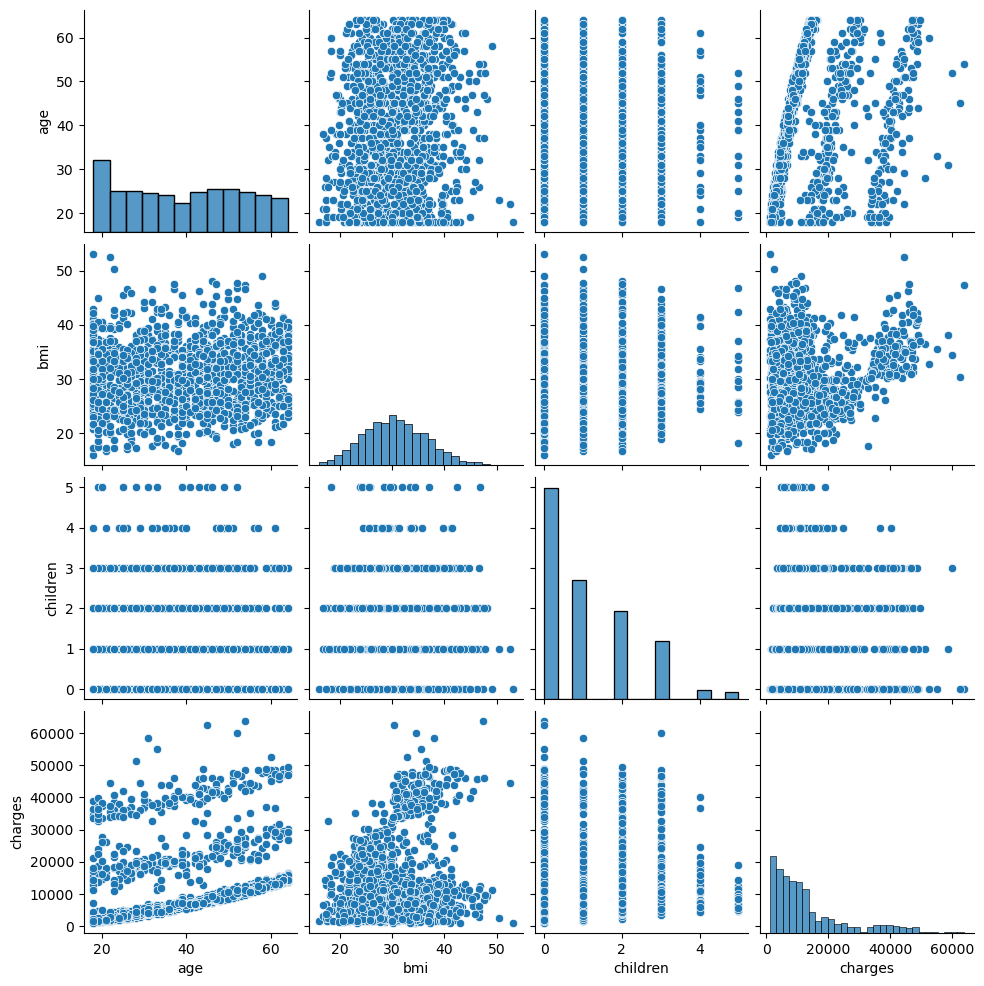

In [10]:
sns.pairplot(df)

Well from looking at this quick visuals that display only 4 features, it seems to me that there are no correlation at all except between charges and the age.

In [12]:
df.shape

(1338, 7)

# CONVERT CATEGORICAL DATA TO NUMERIC DATA
In order for us to work effectively with this data to train our ML Regression model, we need to convert all the categorical data to numeric dat as ML models work best with numeric data. Using the replace function of pyhton, we convert from the *SEX* column from *Male* to *1* and from *Female* to *2* and also do the same for the SMOKER and REGION column

In [14]:
df['Num_Sex'] = df['sex'].replace({'male': 1, 'female': 2})

C:\Users\User\AppData\Local\Temp\ipykernel_5868\2880933566.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Num_Sex'] = df['sex'].replace({'male': 1, 'female': 2})


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Num_Sex
0,19,female,27.900,0,yes,southwest,16884.92400,2
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [16]:
df['Smoke_OR_Not'] = df['smoker'].replace({'yes': 1, 'no': 0})

C:\Users\User\AppData\Local\Temp\ipykernel_5868\4016344546.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoke_OR_Not'] = df['smoker'].replace({'yes': 1, 'no': 0})


In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Num_Sex,Smoke_OR_Not
0,19,female,27.900,0,yes,southwest,16884.92400,2,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [18]:
df['Region_No'] = df['region'].replace({'southwest': 1, 'northwest': 2, 'southeast': 3, 'northeast': 4})

C:\Users\User\AppData\Local\Temp\ipykernel_5868\3551556557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Region_No'] = df['region'].replace({'southwest': 1, 'northwest': 2, 'southeast': 3, 'northeast': 4})


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Num_Sex,Smoke_OR_Not,Region_No
0,19,female,27.900,0,yes,southwest,16884.92400,2,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,3
2,28,male,33.000,3,no,southeast,4449.46200,1,0,3
3,33,male,22.705,0,no,northwest,21984.47061,1,0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,0,2


After all the replacing has been done, I discovered that the replacing did not actually replace the old ones but was saved in a new set of columns that was also created by me. My bad. so what I will do now is to extract all the relevant columns that are numerical and then work with it.

In [21]:
df1 = df[['age', 'Num_Sex', 'Smoke_OR_Not',	'Region_No', 'children','bmi', 'charges']]

In [22]:
df1.head()

,age,Num_Sex,Smoke_OR_Not,Region_No,children,bmi,charges
0,19,2,1,1,0,27.900,16884.92400
1,18,1,0,3,1,33.770,1725.55230
2,28,1,0,3,3,33.000,4449.46200
3,33,1,0,2,0,22.705,21984.47061
4,32,1,0,2,0,28.880,3866.85520


In [23]:
df1.shape

(1338, 7)

In [24]:
df1.corr()

,age,Num_Sex,Smoke_OR_Not,Region_No,children,bmi,charges
age,1.000000,0.020856,-0.025019,-0.006660,0.042469,0.109272,0.299008
Num_Sex,0.020856,1.000000,-0.076185,-0.006640,-0.017163,-0.046371,-0.057292
Smoke_OR_Not,-0.025019,-0.076185,1.000000,0.044124,0.007673,0.003750,0.787251
Region_No,-0.006660,-0.006640,0.044124,1.000000,-0.035494,0.004036,0.051509
children,0.042469,-0.017163,0.007673,-0.035494,1.000000,0.012759,0.067998
bmi,0.109272,-0.046371,0.003750,0.004036,0.012759,1.000000,0.198341
charges,0.299008,-0.057292,0.787251,0.051509,0.067998,0.198341,1.000000


After converting the features to numerical, we are able to see clearly that there is a fairly good correlation between smoking and the amount of premium to be paid or the charges.

## Training the model
# After ensuring that all the data has been converted to numerical data as machine learning functions well with numerical dat, we can now go ahead to use a regression model to train the machine on how to predict the charge to be paid on insurance based on certain factors

We will now split the dataset to a test and train part for the ML model that we wish to train.

In [28]:
from sklearn.model_selection import train_test_split

After importing the module, we will then list the features column as X and the target column as y, from there we split and begin the training

In [30]:
X = df1[['age', 'Num_Sex', 'Smoke_OR_Not', 'Region_No', 'children', 'bmi']] # features
y = df1[['charges']] # Targets.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 123)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

After training the model with the .fit module from sklearn Linear Regression, we now give it the X_test festures so it can predict the Target y

In [35]:
y_pred = model.predict(X_test)
y_pred[:10]

array([[15532.08740486],
       [ 9131.7354819 ],
       [28258.6103606 ],
       [ 5115.81187311],
       [11837.54789174],
       [11510.14815306],
       [ 2751.87729808],
       [ 2607.25519636],
       [ 4707.99070185],
       [ 8686.04767541]])

We will use the r2_score and mean squared error to test the level of accuracy of our prediction by using the test target and the predicted target.

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
acc = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R square is {acc}")
print(f"mse 1 is {mse}")

R square is 0.7991763642809275
mse 1 is 30705040.10284209


OK we have seen the result, lets visualize it to have a better picture

In [40]:
import matplotlib.pyplot as plt 

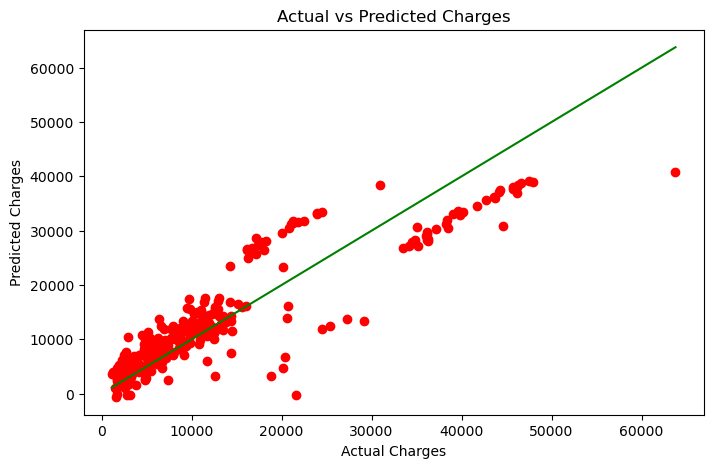

In [41]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green')  # Diagonal line
plt.show()

Our model is performing really poorly.
could it be that there are many factors that is preventing it from performing well? well lets remove some of the less relevant columns and see how it performs.

Let us remove the region column

In [44]:
X1 = df1[['age', 'Num_Sex', 'Smoke_OR_Not', 'children', 'bmi']] # features
y = df1[['charges']] # Targets.

In [45]:
X1_train, X1_test, y_train, y_test = train_test_split(X1,y, train_size = 0.8, random_state = 123)


In [46]:
model= LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [47]:
y_pred1 = model.predict(X1_test)
y_pred1[:20]

array([[15418.19827665],
       [ 8785.68408591],
       [28651.21097961],
       [ 5230.75136267],
       [11732.75840459],
       [11364.43940224],
       [ 2355.8695237 ],
       [ 2943.51199016],
       [ 4604.36644455],
       [ 8334.01897255],
       [ 8031.74238834],
       [13321.05181723],
       [13774.09386755],
       [28998.13601995],
       [13045.41266519],
       [30231.99239751],
       [15474.72037975],
       [ 1205.72748749],
       [33830.88956292],
       [35666.2101431 ]])

In [48]:
acc1 = r2_score(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)

print(f"R square is {acc1}")
print(f"mse 1 is {mse1}")

R square is 0.7991113477069292
mse 1 is 30714980.847639505


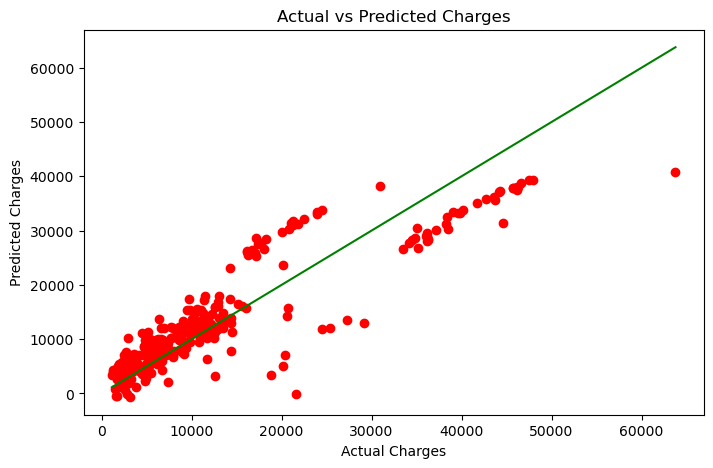

In [49]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred1, color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green')  # Diagonal line
plt.show()

We can see that there no much difference meaning that the region has no effect whatsover on the charges.
If that is the case let us remove the Children and sex column

In [114]:
X2 = df1[['age', 'Smoke_OR_Not', 'bmi']] # features
y = df1[['charges']] # Targets.

In [116]:
X2_train, X2_test, y_train, y_test = train_test_split(X2,y, train_size = 0.8, random_state = 123)

In [102]:
model.fit(X2_train, y_train)

LinearRegression()

In [104]:
y_pred2 = model.predict(X2_test)
y_pred2[:5]

array([[15000.86565184],
       [ 8848.85843539],
       [29071.11315635],
       [ 5291.4259555 ],
       [12287.31232268]])

In [106]:
acc2 = r2_score(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)

print(f"R square is {acc2}")
print(f"mse 1 is {mse2}")

R square is 0.7961131646662085
mse 1 is 31173389.690659195


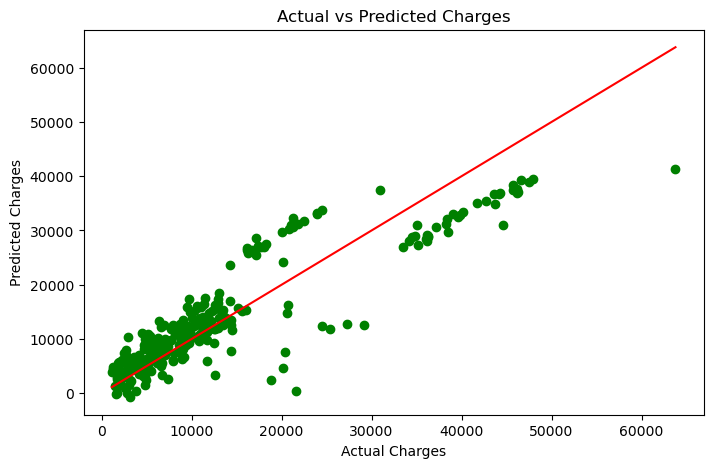

In [108]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred2, color='green')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal line
plt.show()

The result is stil very far from being accurate, it equally goes to mean that all the factors we have received has little correlation with the price.

Now let us remove the age column.

In [153]:
X3 = df1[['Smoke_OR_Not','bmi']] # features
y = df1[['charges']]

In [155]:
X3_train, X3_test, y_train, y_test = train_test_split(X3,y, train_size = 0.8, random_state = 123)

In [157]:
model.fit(X3_train, y_train)

LinearRegression()

In [159]:
y_pred3 = model.predict(X3_test)
y_pred3[:5]

array([[13187.58836515],
       [11108.11946414],
       [32217.76778378],
       [ 5970.72248794],
       [ 6597.09197917]])

In [161]:
acc3 = r2_score(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)

print(f"R square is {acc3}")
print(f"mse 1 is {mse3}")

R square is 0.7126265056210956
mse 1 is 43938128.287556544


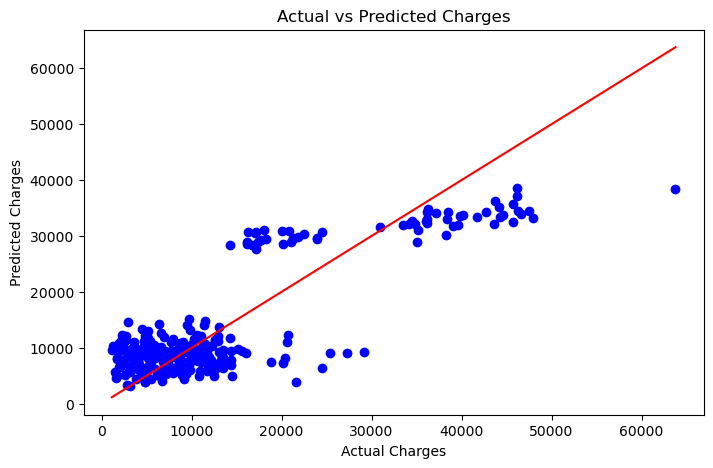

In [163]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred3, color='blue')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal line
plt.show()

Lets use only the smoker or not column.

In [131]:
X4 = df1[['Smoke_OR_Not']] # features
y = df1[['charges']]

In [133]:
X4_train, X4_test, y_train, y_test = train_test_split(X4,y, train_size = 0.8, random_state = 123)

In [135]:
model.fit(X4_train, y_train)

LinearRegression()

In [137]:
y_pred4 = model.predict(X4_test)
y_pred4[:5]

array([[ 8505.41551562],
       [ 8505.41551562],
       [31924.62635285],
       [ 8505.41551562],
       [ 8505.41551562]])

In [139]:
acc4 = r2_score(y_test, y_pred4)
mse4 = mean_squared_error(y_test, y_pred4)

print(f"R square is {acc4}")
print(f"mse 1 is {mse4}")

R square is 0.6730462472240666
mse 1 is 49989773.63801569


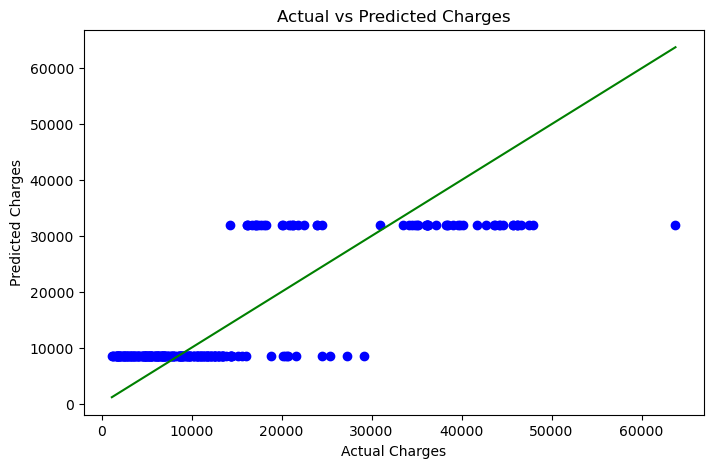

In [141]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred4, color='blue')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green')  # Diagonal line
plt.show()